In [95]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [103]:
c_data=pd.read_csv("C:\\Users\\ajlad\\Downloads\\Churn_Modelling.csv")

In [104]:
c_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [106]:
c_data.head()
c_data.drop(columns=["RowNumber","CustomerId","Surname","Geography"],inplace=True)

In [107]:
c_data = pd.get_dummies(c_data,columns=['Gender'],drop_first=True)

In [108]:
c_data.shape

(10000, 10)

In [111]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [117]:
c_data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Male'],
      dtype='object')

In [118]:
x=c_data.drop(columns=['Exited'])
y=c_data['Exited'].values

In [119]:
print(x.head())
y

   CreditScore  Age  Tenure  ...  IsActiveMember  EstimatedSalary  Gender_Male
0          619   42       2  ...               1        101348.88        False
1          608   41       1  ...               1        112542.58        False
2          502   42       8  ...               0        113931.57        False
3          699   39       1  ...               0         93826.63        False
4          850   43       2  ...               1         79084.10        False

[5 rows x 9 columns]


array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [121]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [122]:
x_train_scaled=scaler.fit_transform(x_train)   
x_test_scaled=scaler.transform(x_test)   


In [136]:
model=Sequential()


In [137]:
model.add(Dense(9,activation="relu",input_dim=9))
model.add(Dense(4,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

d:\codes\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [138]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 4)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 135 (540.00 B)

 Trainable params: 135 (540.00 B)

 Non-trainable params: 0 (0.00 B)

In [143]:
model.compile(optimizer='Adam',loss="binary_crossentropy",metrics=['accuracy'])

In [167]:
history=model.fit(x_train,y_train,batch_size=100,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7884 - loss: 0.5140 - val_accuracy: 0.8087 - val_loss: 0.4872
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7923 - loss: 0.5093 - val_accuracy: 0.8087 - val_loss: 0.4873
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7923 - loss: 0.5074 - val_accuracy: 0.8087 - val_loss: 0.4873
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7898 - loss: 0.5112 - val_accuracy: 0.8087 - val_loss: 0.4873
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7935 - loss: 0.5066 - val_accuracy: 0.8087 - val_loss: 0.4873
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7881 - loss: 0.5128 - val_accuracy: 0.8087 - val_loss: 0.4872
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7848 - loss: 0.5180 - val_accuracy: 0.8087 - val_loss: 0.4873
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7877 - loss: 0.5140 - val_accuracy: 0.8087 - v

In [168]:
y_pred=model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [169]:
y_pred = y_pred.argmax(axis=-1)

In [170]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

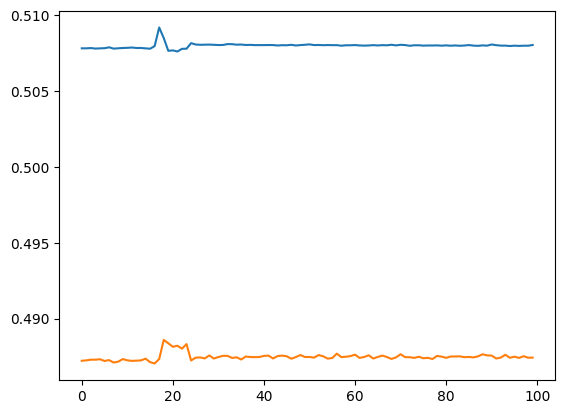

In [171]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

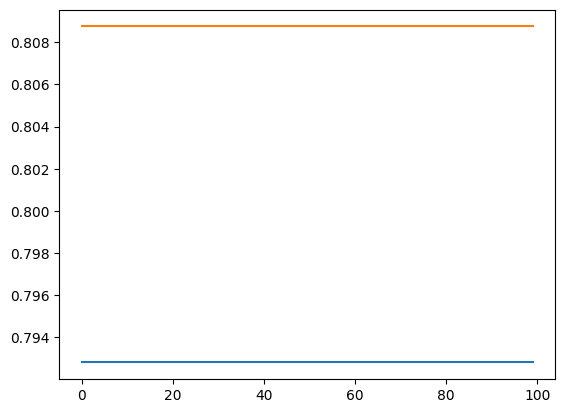

In [172]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])